In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv(r"D:\EDA2\adult_with_headers.csv")

In [118]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Exploration and Preprocessing

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [120]:
# checking for missing value 
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [121]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

C:\Users\PC\AppData\Local\Temp\ipykernel_8408\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
D:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

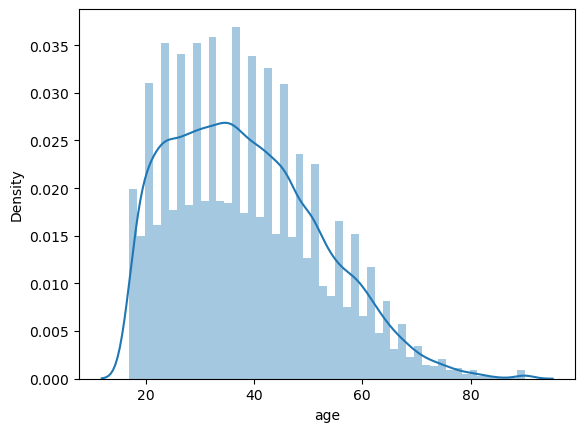

In [123]:
sns.distplot(df['age'])

D:\Users\PC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


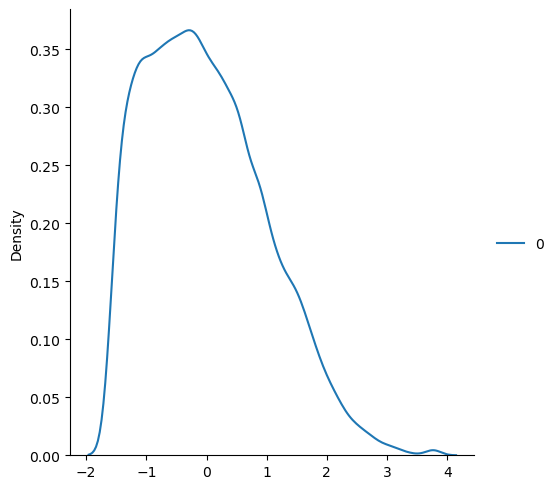

In [124]:
age_2d = df['age'].values.reshape(-1, 1)
age_scaled = scaler.fit_transform(age_2d)

sns.displot(age_scaled, kind = 'kde')

Standard Scaler 

1.When the distribution of the feature is approximately Gaussian (normal distribution).

2.When the scale of the features does not matter much, but you want to make sure each feature has the same scale.

Min Max Scaler

1. When the distribution of the feature does not follow a normal distribution and might be skewed or have outliers.

2. When you need the data to be on a fixed scale and interpretability is important.

# Encoding Techniques:

In [125]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [126]:
pd.unique(df['sex'])

array([' Male', ' Female'], dtype=object)

In [127]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [128]:
sex_encoded = encoder.fit_transform(df[['sex']])

In [129]:
pd.DataFrame(sex_encoded.toarray(), columns = encoder.get_feature_names_out())

,sex_ Female,sex_ Male
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
32556,1.0,0.0
32557,0.0,1.0
32558,1.0,0.0
32559,0.0,1.0


In [130]:
from sklearn.preprocessing import LabelEncoder
l_encoder = LabelEncoder()

In [131]:
marital_status_encoded = l_encoder.fit_transform(df['marital_status'])

In [132]:
df['marital_status'] = marital_status_encoded

In [133]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,4,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,2,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,2,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,2,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,2,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,2,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,6,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,4,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# One-Hot Encoding:
Pros:

* Preserves information: One-Hot Encoding preserves all the information present in the categorical variable by creating binary columns for each category. This prevents the model from assuming any ordinal relationship between categories.

* Suitable for non-linear models: One-Hot Encoding is suitable for non-linear models as it doesn't impose any order or relationship among categories, making it compatible with algorithms like decision trees, random forests, and neural networks.

* Handles multicollinearity: One-Hot Encoding eliminates the issue of multicollinearity, where one feature can be linearly predicted from the others, by creating orthogonal binary features.

Cons:

* Dimensionality: One-Hot Encoding can significantly increase the dimensionality of the dataset, especially when dealing with categorical variables with a large number of unique categories. This can lead to the curse of dimensionality, making the dataset sparse and computationally expensive.

* Memory consumption: With a large number of categories, One-Hot Encoding can consume a lot of memory, especially if the dataset is large.

* May not work well with high cardinality: One-Hot Encoding may not be suitable for categorical variables with high cardinality (many unique categories), as it can lead to a large number of binary features, making it challenging to train the model efficiently.

Label Encoding:

Pros:

* Compact representation: Label Encoding converts categorical variables into integer codes, resulting in a more compact representation compared to One-Hot Encoding. This can be beneficial when memory consumption is a concern.

* Preserves ordinal information: Label Encoding can be useful for ordinal categorical variables, where there is a natural order among the categories. It encodes the categories with integer values while preserving the ordinal relationship.

* Reduced dimensionality: Label Encoding reduces the dimensionality of the dataset compared to One-Hot Encoding, as it creates only one additional feature instead of multiple binary features for each category.

Cons:

* Assumption of ordinality: Label Encoding may introduce unintended ordinality or order among the categories, even when no such relationship exists. This can mislead the model into making incorrect assumptions about the data.

* Incompatibility with non-linear models: Label Encoding may not work well with non-linear models that assume no ordinal relationship among categories. It can lead to biased or inaccurate predictions, especially in algorithms like decision trees and neural networks.

* Sensitive to encoding: The choice of encoding integers for categories in Label Encoding can affect the performance of the model. Different encoding schemes can result in different model behavior, making it less robust compared to One-Hot Encoding.

# Feature Engineering:

In [134]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,4,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,2,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,2,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,2,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [135]:
Edu_occpation = df.groupby(['education','occupation']).size().reset_index().rename(columns={0:'Edu_occpation'})
Edu_occpation

,education,occupation,Edu_occpation
0,10th,?,102
1,10th,Adm-clerical,38
2,10th,Craft-repair,170
3,10th,Exec-managerial,24
4,10th,Farming-fishing,44
...,...,...,...
212,Some-college,Prof-specialty,430
213,Some-college,Protective-serv,202
214,Some-college,Sales,1009
215,Some-college,Tech-support,273


In [136]:
Occupation_based_on_sex = df.groupby(['sex','occupation']).size().reset_index().rename(columns={0 : "Occupation_sex_ratio"})
Occupation_sex_ratio

NameError: name 'Occupation_sex_ratio' is not defined

In [ ]:
df.head()

In [ ]:
sns.distplot(df['fnlwgt'])

In [ ]:
log_data = np.log10(df['fnlwgt'])
sns.distplot(log_data)

# Feature Selection

In [ ]:
df.head()

In [ ]:
sns.boxplot(df['age'])

In [ ]:
x = df[['age']]
x

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
clf = IsolationForest(contamination='auto')
clf.fit(x)
prediction = clf.predict(x)

In [ ]:
x = pd.DataFrame(x)

In [ ]:
x['outliers'] = prediction

In [137]:
x

,0,outliers
0,39,1
1,50,1
2,38,1
3,53,-1
4,28,1
...,...,...
32556,27,1
32557,40,1
32558,58,-1
32559,22,-1
